Cross-Validation

In [1]:
# Imports
import matplotlib.pyplot as plt
from cross_validation import cross_validation
from OLS_Ridge import generate_data, fit_polynomial_mod

In [5]:
def run_experiment_CV(x, y, degrees, lmbda=0, lass=False, n_folds=5, LOO=False):
    results = []
    for fold in n_folds:
        fold_result = cross_validation(x, y, degrees=degrees, lmbda=lmbda, lass=lass, n_folds=fold, LOO=LOO, GD_meth="GDM")
        
        fold_result["K-Folds"] = fold
        results.append(fold_result)
    
    return results

In [6]:
n = 50

# Generate data
x, y = generate_data(n, seed=42)

# Number of folds
n_folds = list(range(3, 21))

In [7]:
res_CV_OLS = run_experiment_CV(x, y, degrees=8, lmbda=0, lass=False, n_folds=n_folds, LOO=False)

In [8]:
res_CV_Ridge = run_experiment_CV(x, y, degrees=8, lmbda=0.00001, lass=False, n_folds=n_folds, LOO=False)

In [9]:
res_CV_Lasso = run_experiment_CV(x, y, degrees=8, lmbda=0.001, lass=True, n_folds=n_folds, LOO=False)

Plotting the MSE of the different methods using cross-validation

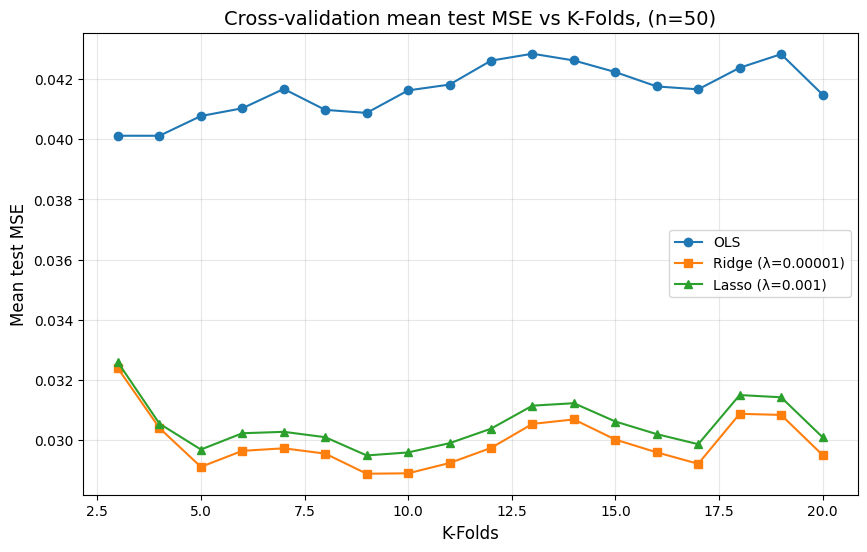

In [10]:
plt.figure(figsize=(10, 6))
plt.plot([r["K-Folds"] for r in res_CV_OLS], [r["test_mse"] for r in res_CV_OLS], 'o-', label='OLS')
plt.plot([r["K-Folds"] for r in res_CV_Ridge], [r["test_mse"] for r in res_CV_Ridge], 's-', label='Ridge (λ=0.00001)')
plt.plot([r["K-Folds"] for r in res_CV_Lasso], [r["test_mse"] for r in res_CV_Lasso], '^-', label='Lasso (λ=0.001)')
plt.xlabel("K-Folds", fontsize=12)
plt.ylabel("Mean test MSE", fontsize=12)
plt.title("Cross-validation mean test MSE vs K-Folds, (n=50)", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()